```
python main.py --model fedavg --dataset fl_digits --parti_num 40 --communication_epoch 100 --local_epoch 10 --device_id 0 --csv_log
```

```
python main.py --model fpl --dataset fl_digits --parti_num 40 --communication_epoch 100 --local_epoch 10 --device_id 0 --csv_log
```

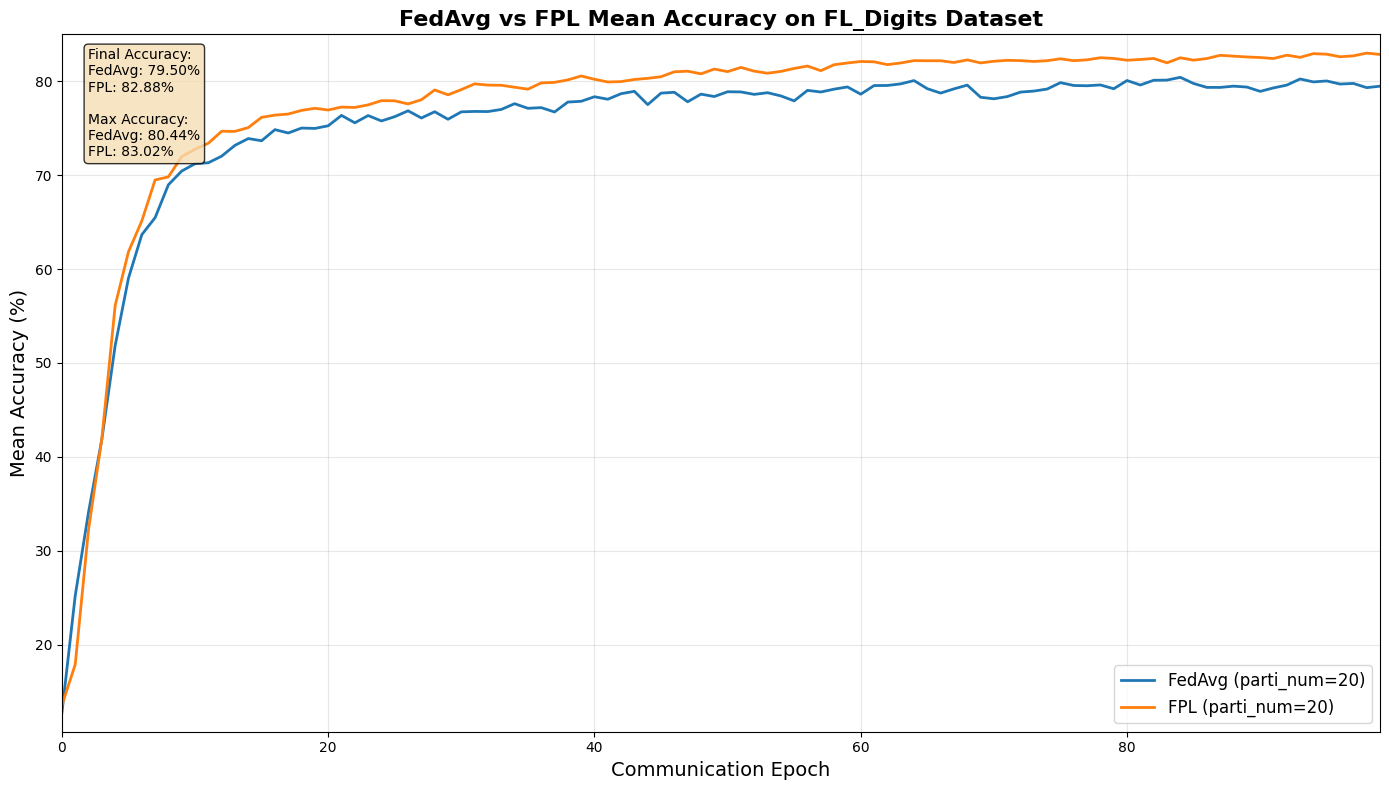

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Define paths
fedavg_path = "fl_digits/fedavg/para1/mean_acc.csv"
fpl_path = "fl_digits/fpl/para1/mean_acc.csv"

# Read data
data_sets = []
labels = []

if os.path.exists(fedavg_path):
    df1 = pd.read_csv(fedavg_path)
    # Get the first (and only) data row
    values1 = df1.iloc[0].values
    data_sets.append(values1)
    labels.append("FedAvg (parti_num=20)")

if os.path.exists(fpl_path):
    df2 = pd.read_csv(fpl_path)
    # Get the first (and only) data row
    values2 = df2.iloc[0].values
    data_sets.append(values2)
    labels.append("FPL (parti_num=20)")

# Create the plot
plt.figure(figsize=(14, 8))

# Plot each dataset
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
for i, (data, label) in enumerate(zip(data_sets, labels)):
    epochs = range(len(data))
    plt.plot(epochs, data, label=label, linewidth=2, color=colors[i])

# Customize the plot
plt.title('FedAvg vs FPL Mean Accuracy on FL_Digits Dataset', fontsize=16, fontweight='bold')
plt.xlabel('Communication Epoch', fontsize=14)
plt.ylabel('Mean Accuracy (%)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Set axis limits for better visualization
plt.xlim(0, 99)
if data_sets:
    all_values = np.concatenate(data_sets)
    plt.ylim(min(all_values) - 2, max(all_values) + 2)

# Add some statistics as text
if len(data_sets) >= 2:
    final_acc1 = data_sets[0][-1]
    final_acc2 = data_sets[1][-1]
    max_acc1 = max(data_sets[0])
    max_acc2 = max(data_sets[1])
    
    stats_text = f"Final Accuracy:\nFedAvg: {final_acc1:.2f}%\nFPL: {final_acc2:.2f}%\n\nMax Accuracy:\nFedAvg: {max_acc1:.2f}%\nFPL: {max_acc2:.2f}%"
    plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()

# Show the plot
plt.show()

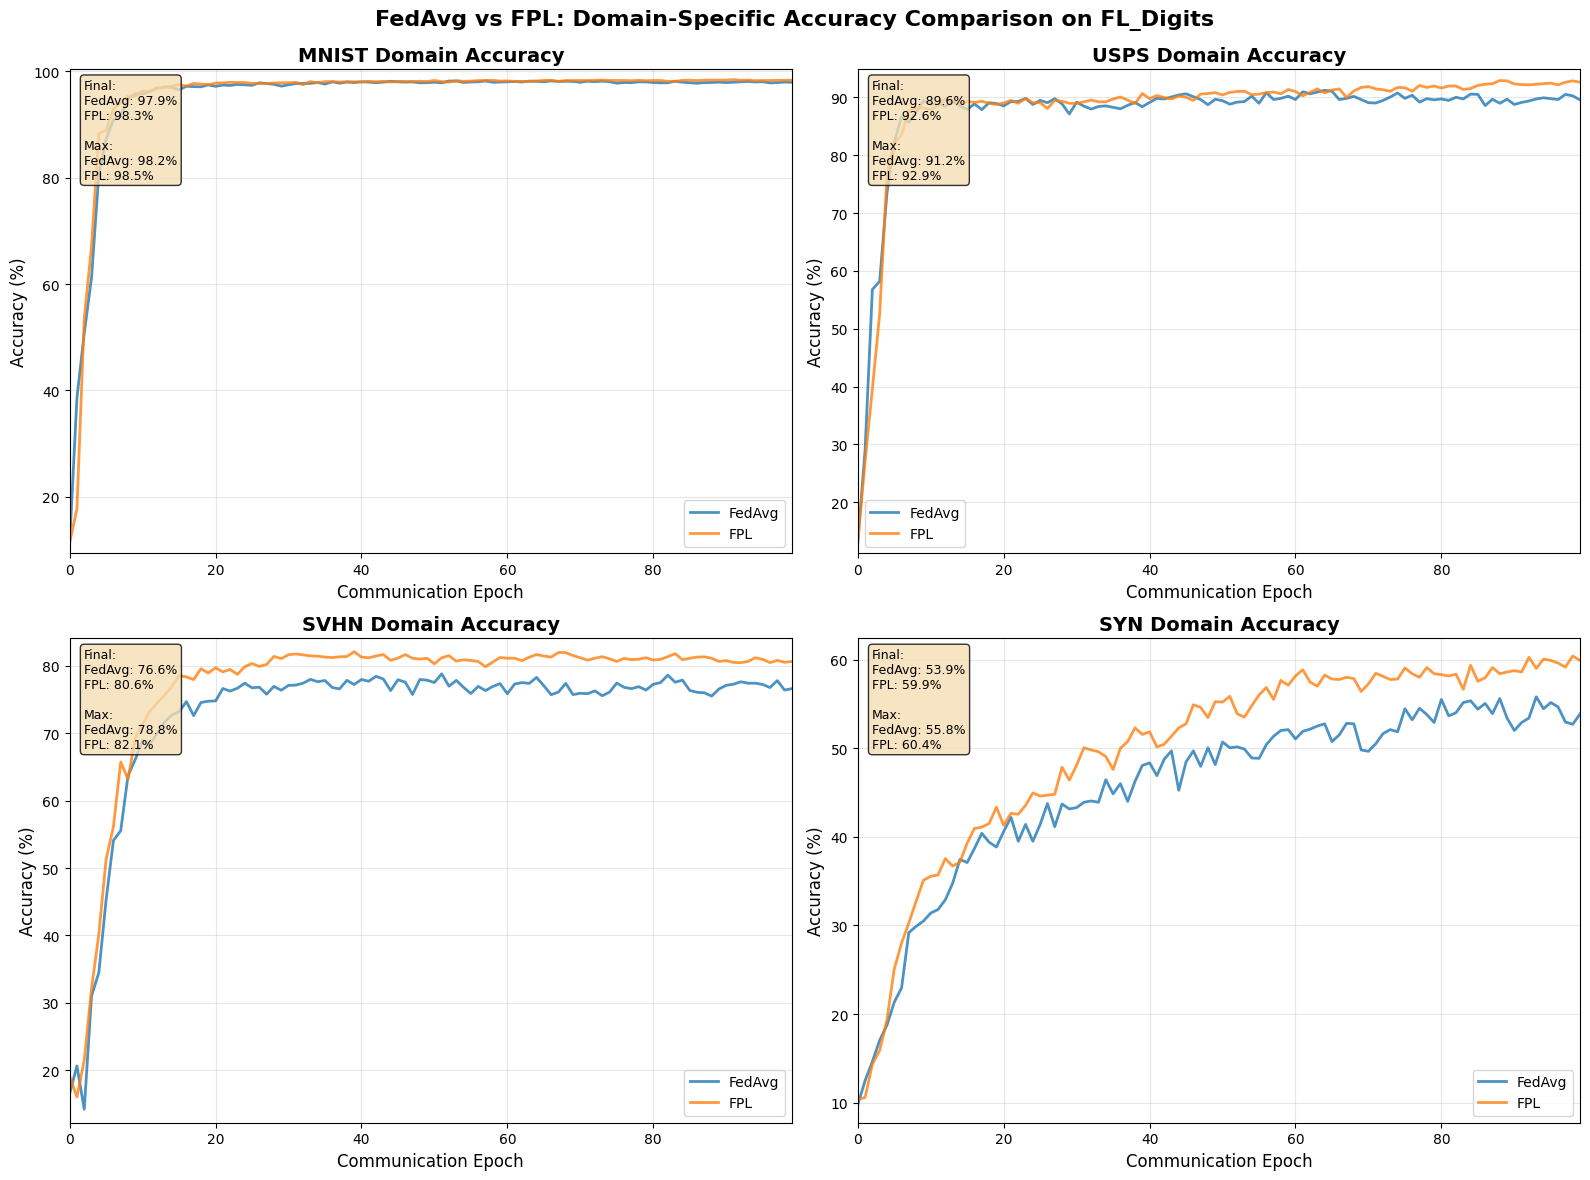

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def plot_domain_accuracy_comparison():
    """Plot domain-specific accuracy comparison between FedAvg and FPL"""
    
    # Define paths
    fedavg_path = "fl_digits/fedavg/para1/all_acc.csv"
    fpl_path = "fl_digits/fpl/para1/all_acc.csv"
    
    # Domain names
    domains = ['MNIST', 'USPS', 'SVHN', 'SYN']
    
    # Read data
    fedavg_data = []
    fpl_data = []
    
    if os.path.exists(fedavg_path):
        df_fedavg = pd.read_csv(fedavg_path, header=None)
        # Skip first row (header) and convert to numeric
        for i in range(4):
            row_data = pd.to_numeric(df_fedavg.iloc[i+1].values, errors='coerce')
            fedavg_data.append(row_data)
    
    if os.path.exists(fpl_path):
        df_fpl = pd.read_csv(fpl_path, header=None)
        # Skip first row (header) and convert to numeric
        for i in range(4):
            row_data = pd.to_numeric(df_fpl.iloc[i+1].values, errors='coerce')
            fpl_data.append(row_data)
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    colors = ['#1f77b4', '#ff7f0e']  # Blue for FedAvg, Orange for FPL
    
    for i, domain in enumerate(domains):
        ax = axes[i]
        
        # Plot FedAvg data
        if fedavg_data:
            epochs = range(len(fedavg_data[i]))
            ax.plot(epochs, fedavg_data[i], label='FedAvg', 
                   linewidth=2, color=colors[0], alpha=0.8)
        
        # Plot FPL data
        if fpl_data:
            epochs = range(len(fpl_data[i]))
            ax.plot(epochs, fpl_data[i], label='FPL', 
                   linewidth=2, color=colors[1], alpha=0.8)
        
        # Customize each subplot
        ax.set_title(f'{domain} Domain Accuracy', fontsize=14, fontweight='bold')
        ax.set_xlabel('Communication Epoch', fontsize=12)
        ax.set_ylabel('Accuracy (%)', fontsize=12)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=10)
        ax.set_xlim(0, 99)
        
        # Set y-axis limits based on data
        if fedavg_data and fpl_data:
            all_values = np.concatenate([fedavg_data[i], fpl_data[i]])
            # Remove NaN values
            all_values = all_values[~np.isnan(all_values)]
            if len(all_values) > 0:
                ax.set_ylim(min(all_values) - 2, max(all_values) + 2)
        
        # Add statistics text
        if fedavg_data and fpl_data:
            final_fedavg = fedavg_data[i][-1]
            final_fpl = fpl_data[i][-1]
            max_fedavg = np.nanmax(fedavg_data[i])
            max_fpl = np.nanmax(fpl_data[i])
            
            stats_text = f"Final:\nFedAvg: {final_fedavg:.1f}%\nFPL: {final_fpl:.1f}%\n\nMax:\nFedAvg: {max_fedavg:.1f}%\nFPL: {max_fpl:.1f}%"
            ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
                   verticalalignment='top', fontsize=9,
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.suptitle('FedAvg vs FPL: Domain-Specific Accuracy Comparison on FL_Digits', 
                 fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    
    # Show the plot
    plt.show()

# Call the function
plot_domain_accuracy_comparison()

```
python main.py --model fedavg --dataset fl_officecaltech --parti_num 10 --communication_epoch 100 --local_epoch 10 --device_id 0 --csv_log
```

```
python main.py --model fpl --dataset fl_officecaltech --parti_num 10 --communication_epoch 100 --local_epoch 10 --device_id 0 --csv_log
```

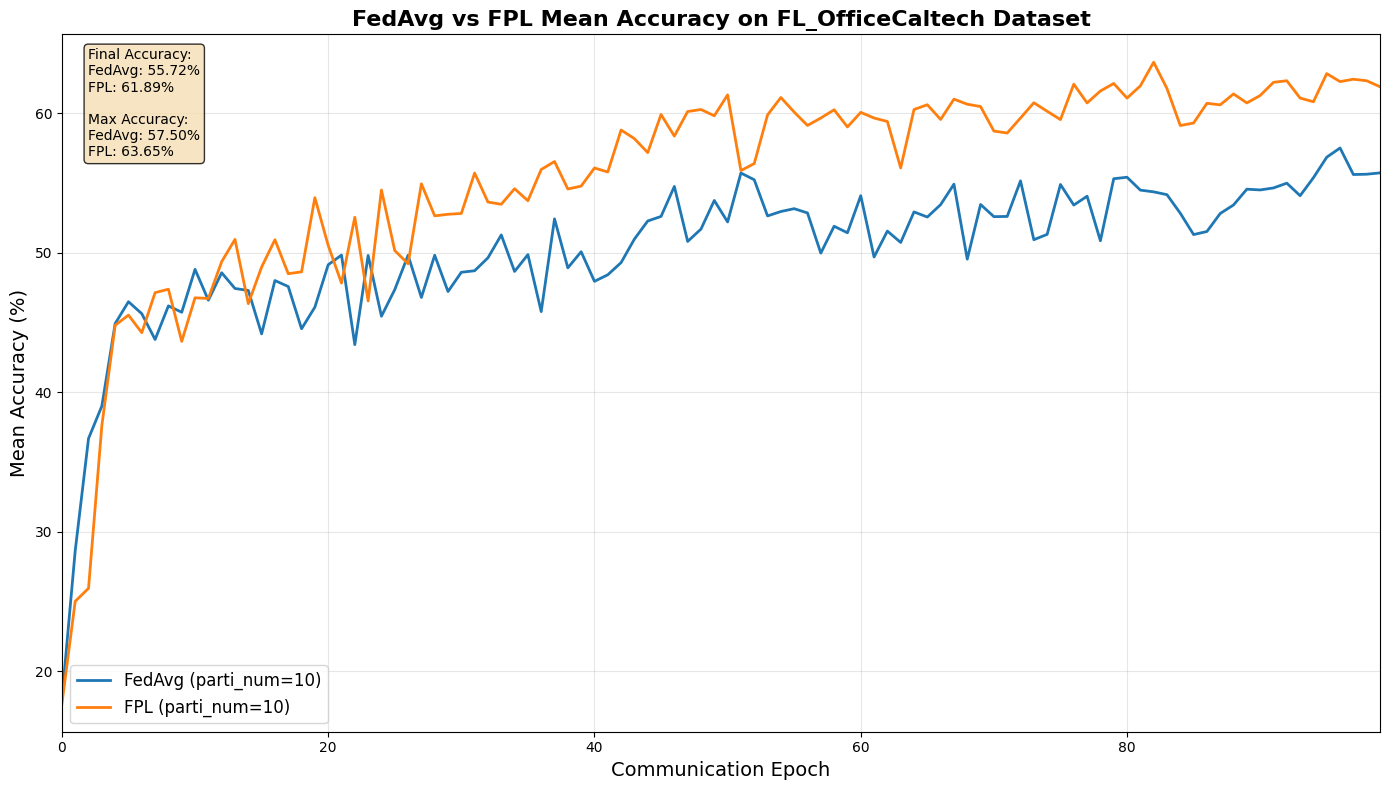

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Define paths
fedavg_path = "fl_officecaltech/fedavg/para1/mean_acc.csv"
fpl_path = "fl_officecaltech/fpl/para1/mean_acc.csv"

# Read data
data_sets = []
labels = []

if os.path.exists(fedavg_path):
    df1 = pd.read_csv(fedavg_path)
    # Get the first (and only) data row
    values1 = df1.iloc[0].values
    data_sets.append(values1)
    labels.append("FedAvg (parti_num=10)")

if os.path.exists(fpl_path):
    df2 = pd.read_csv(fpl_path)
    # Get the first (and only) data row
    values2 = df2.iloc[0].values
    data_sets.append(values2)
    labels.append("FPL (parti_num=10)")

# Create the plot
plt.figure(figsize=(14, 8))

# Plot each dataset
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
for i, (data, label) in enumerate(zip(data_sets, labels)):
    epochs = range(len(data))
    plt.plot(epochs, data, label=label, linewidth=2, color=colors[i])

# Customize the plot
plt.title('FedAvg vs FPL Mean Accuracy on FL_OfficeCaltech Dataset', fontsize=16, fontweight='bold')
plt.xlabel('Communication Epoch', fontsize=14)
plt.ylabel('Mean Accuracy (%)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Set axis limits for better visualization
plt.xlim(0, 99)
if data_sets:
    all_values = np.concatenate(data_sets)
    plt.ylim(min(all_values) - 2, max(all_values) + 2)

# Add some statistics as text
if len(data_sets) >= 2:
    final_acc1 = data_sets[0][-1]
    final_acc2 = data_sets[1][-1]
    max_acc1 = max(data_sets[0])
    max_acc2 = max(data_sets[1])
    
    stats_text = f"Final Accuracy:\nFedAvg: {final_acc1:.2f}%\nFPL: {final_acc2:.2f}%\n\nMax Accuracy:\nFedAvg: {max_acc1:.2f}%\nFPL: {max_acc2:.2f}%"
    plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()

# Show the plot
plt.show()

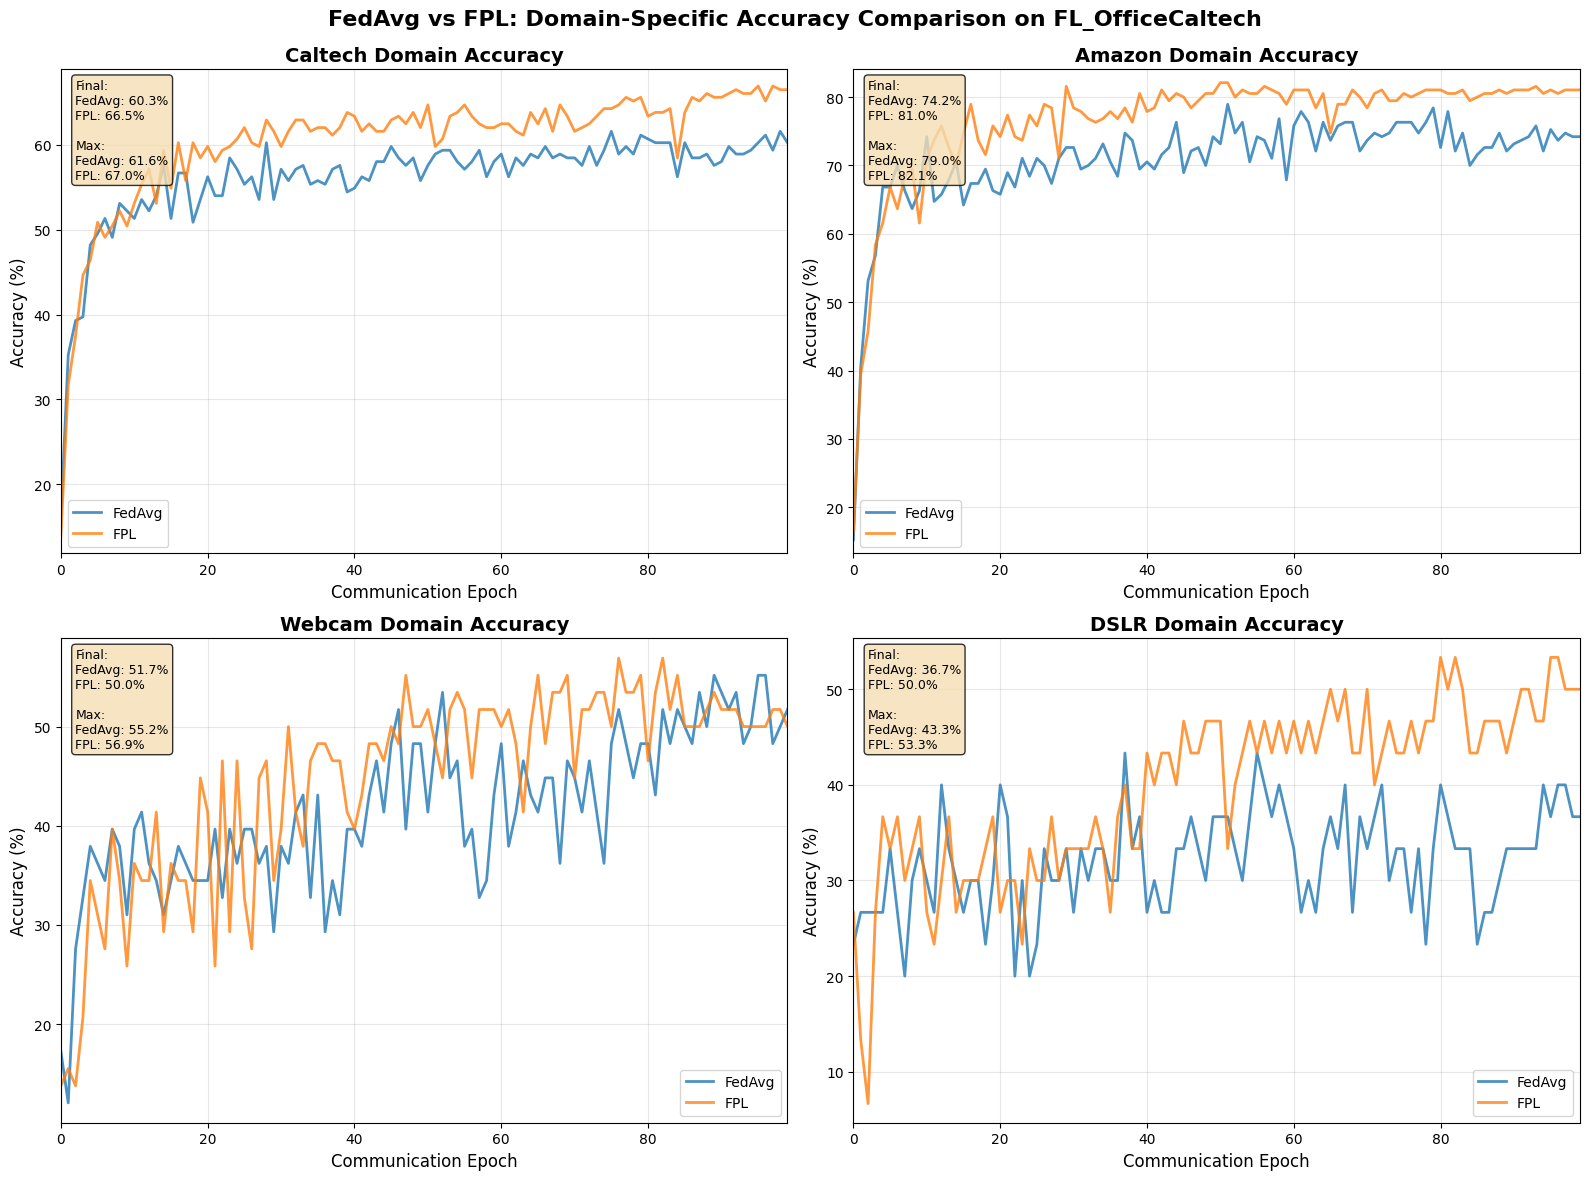

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def plot_domain_accuracy_comparison():
    """Plot domain-specific accuracy comparison between FedAvg and FPL"""
    
    # Define paths
    fedavg_path = "fl_officecaltech/fedavg/para1/all_acc.csv"
    fpl_path = "fl_officecaltech/fpl/para1/all_acc.csv"
    
    # Domain names
    domains = ['Caltech', 'Amazon', 'Webcam', 'DSLR']
    
    # Read data
    fedavg_data = []
    fpl_data = []
    
    if os.path.exists(fedavg_path):
        df_fedavg = pd.read_csv(fedavg_path, header=None)
        # Skip first row (header) and convert to numeric
        for i in range(4):
            row_data = pd.to_numeric(df_fedavg.iloc[i+1].values, errors='coerce')
            fedavg_data.append(row_data)
    
    if os.path.exists(fpl_path):
        df_fpl = pd.read_csv(fpl_path, header=None)
        # Skip first row (header) and convert to numeric
        for i in range(4):
            row_data = pd.to_numeric(df_fpl.iloc[i+1].values, errors='coerce')
            fpl_data.append(row_data)
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    colors = ['#1f77b4', '#ff7f0e']  # Blue for FedAvg, Orange for FPL
    
    for i, domain in enumerate(domains):
        ax = axes[i]
        
        # Plot FedAvg data
        if fedavg_data:
            epochs = range(len(fedavg_data[i]))
            ax.plot(epochs, fedavg_data[i], label='FedAvg', 
                   linewidth=2, color=colors[0], alpha=0.8)
        
        # Plot FPL data
        if fpl_data:
            epochs = range(len(fpl_data[i]))
            ax.plot(epochs, fpl_data[i], label='FPL', 
                   linewidth=2, color=colors[1], alpha=0.8)
        
        # Customize each subplot
        ax.set_title(f'{domain} Domain Accuracy', fontsize=14, fontweight='bold')
        ax.set_xlabel('Communication Epoch', fontsize=12)
        ax.set_ylabel('Accuracy (%)', fontsize=12)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=10)
        ax.set_xlim(0, 99)
        
        # Set y-axis limits based on data
        if fedavg_data and fpl_data:
            all_values = np.concatenate([fedavg_data[i], fpl_data[i]])
            # Remove NaN values
            all_values = all_values[~np.isnan(all_values)]
            if len(all_values) > 0:
                ax.set_ylim(min(all_values) - 2, max(all_values) + 2)
        
        # Add statistics text
        if fedavg_data and fpl_data:
            final_fedavg = fedavg_data[i][-1]
            final_fpl = fpl_data[i][-1]
            max_fedavg = np.nanmax(fedavg_data[i])
            max_fpl = np.nanmax(fpl_data[i])
            
            stats_text = f"Final:\nFedAvg: {final_fedavg:.1f}%\nFPL: {final_fpl:.1f}%\n\nMax:\nFedAvg: {max_fedavg:.1f}%\nFPL: {max_fpl:.1f}%"
            ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
                   verticalalignment='top', fontsize=9,
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.suptitle('FedAvg vs FPL: Domain-Specific Accuracy Comparison on FL_OfficeCaltech', 
                 fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    
    # Show the plot
    plt.show()

# Call the function
plot_domain_accuracy_comparison()